Cancer Detection by SVM

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer #this dataset is orginally come with sklearn library
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
cancer['data'].shape

(569, 30)

Now we create a new data frame has a data and target together

In [18]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns= np.append(cancer['feature_names'],['target'])) #(np.c_) mean concatenation...then we specify which coloumns that we need from data

In [20]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


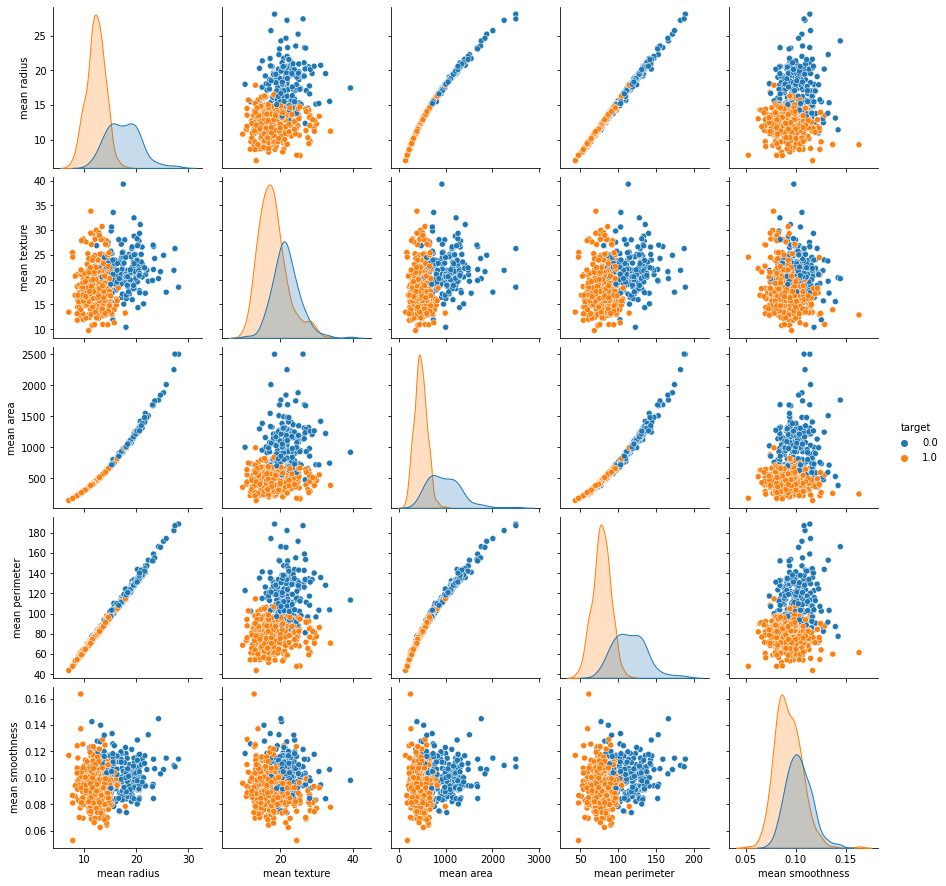

In [21]:
sns.pairplot(df_cancer,hue='target',vars=['mean radius','mean texture','mean area','mean perimeter','mean smoothness'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


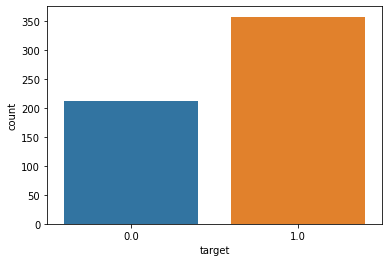

In [23]:
sns.countplot(df_cancer['target'],label='Count')

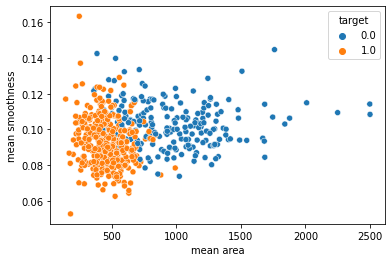

In [24]:
sns.scatterplot(x= 'mean area' ,y= 'mean smoothness' ,hue = 'target' ,data=df_cancer)

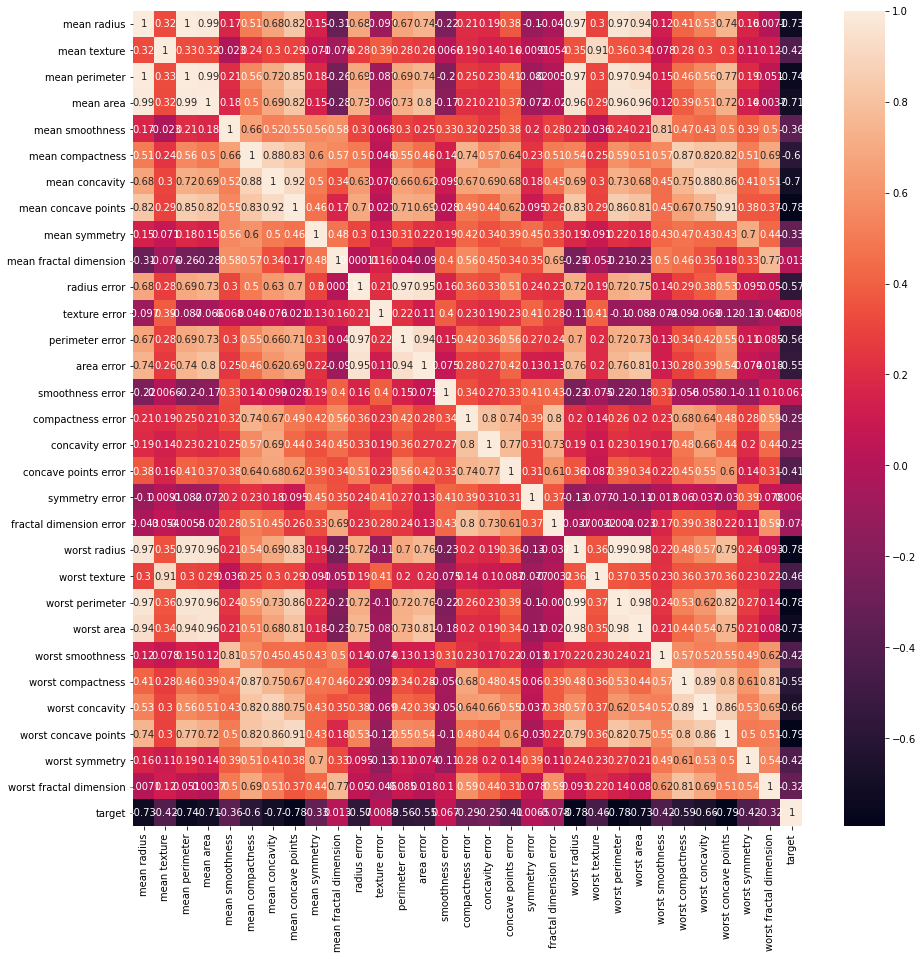

In [28]:
plt.figure(figsize=[15,15])
sns.heatmap(df_cancer.corr(),annot=True) #correlation shows the relationship between variables

In [29]:
X = df_cancer.drop(['target'], axis=1)
y = df_cancer['target']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model=SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
y_predict = svc_model.predict(X_test)

In [34]:
y_predict

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.])

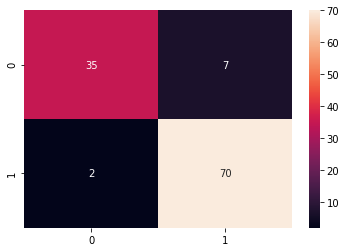

In [35]:
cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89        42
         1.0       0.91      0.97      0.94        72

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



Now we will try to improve the model
we will make a scalling for all the values

In [38]:
min_train = X_train.min()
min_train

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.362800
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [ ]:
max_train = X_train.max()
max_train

In [ ]:
range_train = (X_train - min_train).max()  #we will find max diff. between values
range_train

In [ ]:
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled

Now we use scatter plotting to show diffrence between scaling and non-sacaling and we use ['mean area'] and ['mean smoothness'] just as example

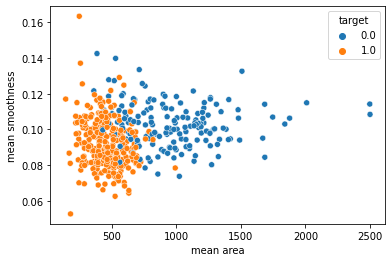

In [43]:
sns.scatterplot(x= X_train['mean area'] ,y= X_train['mean smoothness'] ,hue = y_train )

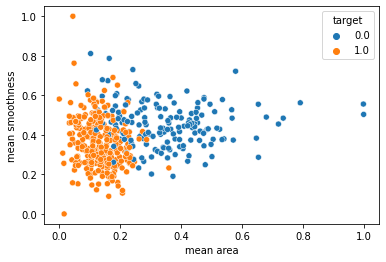

In [45]:
sns.scatterplot(x= X_train_scaled['mean area'] ,y= X_train_scaled['mean smoothness'] ,hue = y_train )

In [46]:
min_test = X_test.min()
range_test = (X_test - min_test).max()  #we will find max diff. between values
X_test_scaled = (X_test - min_test)/range_test

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model=SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
y_predict = svc_model.predict(X_test_scaled)

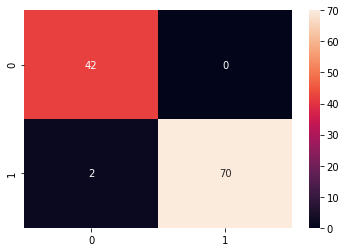

In [49]:
cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

WOW!!! IMPROVING..........

In [50]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        42
         1.0       1.00      0.97      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



NOW, Trying to do more improvement by change parameters





In [58]:
param_grid = { 'c':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}  #radial basis function (RBF)

In [61]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose=10)  #verbose mean (how much showing info while training)

In [62]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] c=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: ignored

In [ ]:
grid.best_params_

In [ ]:
grid_predict = grid.predict(X_test_scaled)
cm= confusion_matrix(y_test, grid_predict)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, grid_predict))